# Simulations

In [4]:
# Import Libraries
from scipy import integrate
import numpy as np
import matplotlib.pyplot as plt

In [27]:
def dXdTCase2(X, t=0):
    # Case 2: Paper to Rock
    # eps = 0.4, mu = 0.1 for stable limit cycle
    # eps = 1, mu = 0.4 for stable interior fixed point
    # eps = 0.1, mu = 0.6 for coexistence
    eps = 0.4
    mu = 0.1
    fx = 1 - X[0] - (eps + 2)*X[1];
    fy = (eps + 2)*X[0] + (eps + 1)*(X[1]-1);
    fz = X[1] - (eps + 1)*X[0];
    phi = fx*X[0] + fy*X[1] + fz*(1-X[0]-X[1]);
    
    
    return np.array([X[0]*(fx - phi) + mu*X[1], 
                    X[1]*(fy - phi) - mu*X[1]])

def dXdTCase1(X, t=0):
    # Case 1: Rock to Paper 
    # eps = 0.3, mu = 0.3 for stable interior fixed pont
    # eps = 0.4, mu = 0.1 for stable limit cycle
    eps = 0.4
    mu = 0.1
    fx = 1 - X[0] - (eps + 2)*X[1];
    fy = (eps + 2)*X[0] + (eps + 1)*(X[1]-1);
    fz = X[1] - (eps + 1)*X[0];
    phi = fx*X[0] + fy*X[1] + fz*(1-X[0]-X[1]);
    
    
    return np.array([X[0]*(fx - phi) - mu*X[0], 
                    X[1]*(fy - phi) + mu*X[0]])
    

In [28]:
# Vertices of triangle in transformed space
triX = [0,0.5,1,0]
triY = [0, (0.75)**0.5, 0,0]

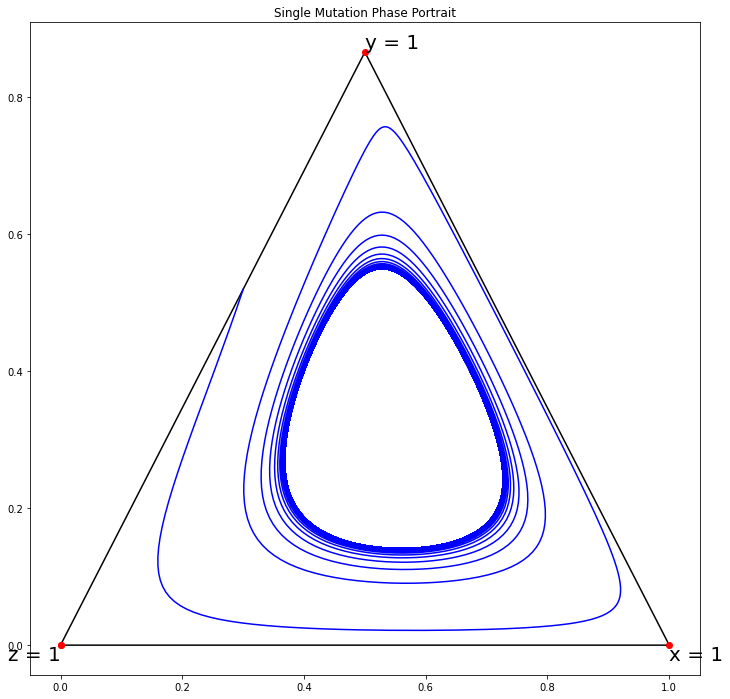

In [29]:
# Plotting figures
# Figsize
plt.rcParams["figure.figsize"] = (12,12)
plt.figure()
# Plotting triangle
plt.plot(triX, triY, color = 'black')
plt.plot(triX, triY, 'o', color = 'red')
# Adding labels to vertices
plt.text(triX[0], triY[0], 'z = 1',verticalalignment = 'top',horizontalalignment = 'right', fontsize = 20);
plt.text(triX[1], triY[1], 'y = 1',verticalalignment = 'bottom',fontsize = 20);
plt.text(triX[2], triY[2], 'x = 1',verticalalignment = 'top',horizontalalignment = 'left', fontsize = 20);

# Plotting trajectories

# Time Horizon
t = np.linspace(0, 1000, 10000)
# Initial Conditions
# Case 1
#ICs = [np.array([0.33, 0.33]), np.array([0.8,0])]
# Case 2
ICs = [np.array([0, 0.6])]
for ic in ICs:
    x = integrate.odeint(dXdTCase2, ic, t)
    # Transfroming coordinates to face of simplex
    X = x[:,0] + 0.5*x[:,1]
    Y = x[:,1]*((0.75)**0.5)
    plt.plot(X,Y, color = 'blue')

# Title
plt.title('Single Mutation Phase Portrait')
# Show figure
plt.show()